In [1]:
%load_ext autoreload
%autoreload 2

import json
from pathlib import Path

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from artifacts_annotator.generators.mask_generator import annotation_to_local_mask
from artifacts_annotator.generators.crop_generator import generate_crop_rectangles_local

In [2]:
# Example file paths
image_path = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.jpg")
json_path  = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.json")

In [3]:
with open(json_path, 'r') as f:
    annotations = json.load(f)

img = Image.open(image_path).convert('RGB')
img_np = np.array(img)


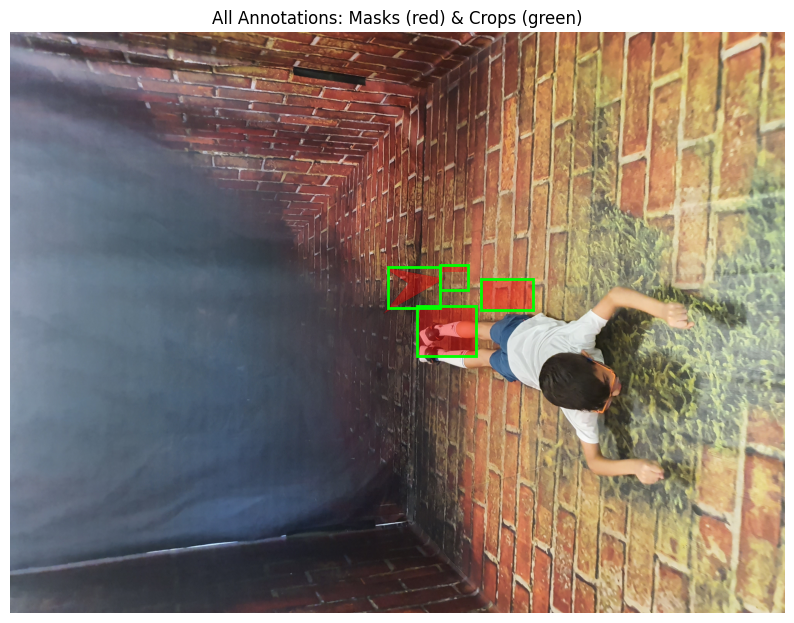

In [4]:
# %% Cell 3: Visualize all annotations on one image
fig, ax = plt.subplots(figsize=(10, 10))

# draw the full image and fix the axes to its size
ax.imshow(img_np)
H, W = img_np.shape[:2]
ax.set_xlim(0, W)
ax.set_ylim(H, 0)             # flip y-axis so origin is top-left
ax.axis('off')

# now overlay each annotation
for ann in annotations:
    local_mask, (x0, y0) = annotation_to_local_mask(ann)
    h, w = local_mask.shape

    # red mask overlay
    overlay = np.zeros((h, w, 4))
    overlay[local_mask] = (1, 0, 0, 0.4)
    ax.imshow(overlay, extent=(x0, x0+w, y0+h, y0), origin='upper')

    crop_rectangles = generate_crop_rectangles_local(local_mask)
    # green crop boxes
    for l, t, r, b in crop_rectangles:
        rect = patches.Rectangle((x0 + l, y0 + t),
                                 r - l, b - t,
                                 edgecolor='lime', fill=False, linewidth=2)
        ax.add_patch(rect)

ax.set_title("All Annotations: Masks (red) & Crops (green)")
plt.show()

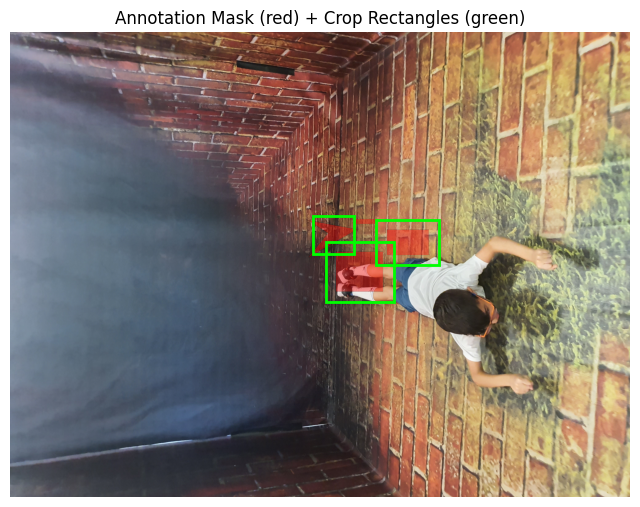

In [13]:
# Cell 4: visualize mask & crop rectangles overlayed
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)

# overlay raw mask in red
overlay = np.zeros((h, w, 4))
overlay[mask] = (1, 0, 0, 0.4)
ax.imshow(overlay, extent=(0, w, h, 0))

# draw green crop boxes
for left, top, right, bottom in crop_boxes:
    rect = patches.Rectangle((left, top),
                             right-left,
                             bottom-top,
                             edgecolor='lime',
                             fill=False,
                             linewidth=2)
    ax.add_patch(rect)

ax.set_title("Annotation Mask (red) + Crop Rectangles (green)")
ax.axis('off')
plt.show()
